<a href="https://colab.research.google.com/github/Abhishek-Adari/Computer-Vision-Projects/blob/main/Abhi_ALPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Install YOLOv8
!pip install ultralytics

In [16]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the ZIP file
uploaded = files.upload()  # Upload small_dataset_ALPR.zip

# Step 2: Unzip the uploaded file
zip_path = "small_dataset_ALPR.zip"  # Adjust if filename is different
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("small_dataset_ALPR")

# Step 3: Verify contents
os.listdir("small_dataset_ALPR")

Saving small_dataset_ALPR.zip to small_dataset_ALPR.zip


['train',
 'README.dataset.txt',
 'test',
 'README.roboflow.txt',
 'valid',
 'data.yaml']

In [17]:
#Load a YOLOv8 model (nano = fast, small = better)
model = YOLO('yolov8n.pt')

In [18]:
DATA_YAML = 'small_dataset_ALPR/data.yaml'

In [19]:
model = YOLO('yolov8n.pt')
model.train(
    data=DATA_YAML,
    epochs=75,
    imgsz=640,
    batch=8
)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=small_dataset_ALPR/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=75, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 64.6MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1355.0±575.4 MB/s, size: 45.4 KB)


train: Scanning /content/small_dataset_ALPR/train/labels... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 2439.89it/s]

train: New cache created: /content/small_dataset_ALPR/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 418.6±157.7 MB/s, size: 24.8 KB)


val: Scanning /content/small_dataset_ALPR/valid/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 1504.63it/s]

val: New cache created: /content/small_dataset_ALPR/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      1.09G       1.57      3.665      1.678         12        640: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all          5          5    0.00333          1     0.0163    0.00655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      1.12G      1.189       3.13      1.402         13        640: 100%|██████████| 7/7 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          5          5    0.00333          1      0.221     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      1.14G      1.105      2.101      1.279         10        640: 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.80it/s]

                   all          5          5    0.00333          1      0.846      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      1.16G      1.121      2.061      1.279         16        640: 100%|██████████| 7/7 [00:01<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.36it/s]

                   all          5          5    0.00333          1      0.826      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      1.17G      1.106      1.731      1.162         13        640: 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.04it/s]

                   all          5          5      0.738        0.6      0.781      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      1.19G      1.226      1.799      1.312         16        640: 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.97it/s]

                   all          5          5       0.63      0.689       0.68      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      1.21G      1.032      1.444      1.176         17        640: 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.03it/s]

                   all          5          5      0.736      0.566      0.627      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      1.22G     0.9764      1.469      1.127         10        640: 100%|██████████| 7/7 [00:01<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.46it/s]

                   all          5          5          1      0.383       0.52      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      1.24G      1.035      1.431      1.181         11        640: 100%|██████████| 7/7 [00:00<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.72it/s]

                   all          5          5          1      0.364       0.52      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      1.26G      1.029      1.415      1.163         16        640: 100%|██████████| 7/7 [00:00<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.53it/s]

                   all          5          5      0.357        0.2      0.423      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      1.28G      0.986      1.459      1.133         16        640: 100%|██████████| 7/7 [00:00<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.48it/s]

                   all          5          5      0.598      0.596      0.598      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      1.29G      1.029      1.306      1.164         14        640: 100%|██████████| 7/7 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.29it/s]

                   all          5          5      0.596      0.591      0.416       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      1.31G      1.048      1.448      1.148         10        640: 100%|██████████| 7/7 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all          5          5      0.918        0.4      0.555      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      1.33G      1.032      1.353      1.143         10        640: 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all          5          5      0.918        0.4      0.555      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      1.34G      1.016      1.297      1.127         11        640: 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          5          5      0.759        0.8      0.822      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      1.36G      1.061      1.365      1.159         12        640: 100%|██████████| 7/7 [00:01<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.39it/s]


                   all          5          5      0.793        0.8      0.855       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      1.38G     0.8604      1.228      1.076         11        640: 100%|██████████| 7/7 [00:00<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.21it/s]

                   all          5          5      0.968        0.6      0.812      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      1.39G     0.8706      1.244      1.029         13        640: 100%|██████████| 7/7 [00:00<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.91it/s]

                   all          5          5      0.968        0.6      0.751      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      1.42G     0.8989      1.108      1.044         15        640: 100%|██████████| 7/7 [00:00<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.06it/s]

                   all          5          5      0.956        0.6      0.737       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      1.43G     0.8397      1.152      1.098         13        640: 100%|██████████| 7/7 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.82it/s]

                   all          5          5      0.965        0.6      0.812      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      1.45G     0.8488       1.06      1.039         13        640: 100%|██████████| 7/7 [00:00<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.46it/s]

                   all          5          5      0.699      0.936      0.898      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      1.46G      0.837      1.147      1.052         10        640: 100%|██████████| 7/7 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all          5          5      0.699      0.936      0.898      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      1.48G     0.8264      1.097      1.058         12        640: 100%|██████████| 7/7 [00:01<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.60it/s]

                   all          5          5      0.826      0.956      0.928      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75       1.5G     0.8603      1.138      1.083          8        640: 100%|██████████| 7/7 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          5          5      0.703      0.951      0.881      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      1.52G     0.7477      1.044      1.035         12        640: 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.00it/s]

                   all          5          5      0.689          1      0.898      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      1.53G     0.7473       1.02      1.019         14        640: 100%|██████████| 7/7 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all          5          5          1      0.974      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      1.55G     0.8243      1.058       1.04          9        640: 100%|██████████| 7/7 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all          5          5      0.976          1      0.995      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      1.57G     0.6952     0.9448     0.9854         10        640: 100%|██████████| 7/7 [00:00<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.14it/s]

                   all          5          5      0.981          1      0.995       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      1.59G     0.7611     0.8748     0.9985         16        640: 100%|██████████| 7/7 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.35it/s]

                   all          5          5      0.979          1      0.995      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75       1.6G     0.7483     0.9354       1.01         14        640: 100%|██████████| 7/7 [00:00<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.06it/s]

                   all          5          5      0.979          1      0.995      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      1.62G     0.7047     0.8878     0.9639         14        640: 100%|██████████| 7/7 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.86it/s]

                   all          5          5      0.983          1      0.995      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      1.64G      0.728      0.896     0.9812         18        640: 100%|██████████| 7/7 [00:01<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.26it/s]

                   all          5          5      0.989          1      0.995      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      1.65G     0.7738     0.9817      1.007         10        640: 100%|██████████| 7/7 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.90it/s]

                   all          5          5      0.997          1      0.995      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      1.67G     0.6853      0.908     0.9602          8        640: 100%|██████████| 7/7 [00:00<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          5          5      0.993          1      0.995      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      1.69G     0.7214     0.9127     0.9771         16        640: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.83it/s]

                   all          5          5      0.988          1      0.995      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      1.71G     0.6765     0.8123     0.9647         13        640: 100%|██████████| 7/7 [00:00<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.24it/s]

                   all          5          5      0.985          1      0.995      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      1.72G     0.6259     0.7629     0.9435         12        640: 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.41it/s]

                   all          5          5      0.981          1      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      1.74G     0.5956     0.7713     0.9426         14        640: 100%|██████████| 7/7 [00:00<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]

                   all          5          5      0.981          1      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      1.75G     0.5733     0.7634     0.9193          9        640: 100%|██████████| 7/7 [00:00<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.79it/s]

                   all          5          5       0.98          1      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      1.77G     0.5445     0.7513      0.932         11        640: 100%|██████████| 7/7 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all          5          5       0.98          1      0.995      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      1.79G     0.5414     0.7463     0.9118         10        640: 100%|██████████| 7/7 [00:01<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all          5          5      0.976          1      0.995      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75       1.8G     0.5802     0.7367      0.955         16        640: 100%|██████████| 7/7 [00:00<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.22it/s]

                   all          5          5      0.978          1      0.995      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      1.82G     0.5716     0.7519     0.9429          7        640: 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]

                   all          5          5      0.981          1      0.995      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      1.84G     0.6195     0.7527     0.9627          7        640: 100%|██████████| 7/7 [00:00<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          5          5      0.983          1      0.995       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      1.86G     0.6046     0.7598     0.9247         12        640: 100%|██████████| 7/7 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.99it/s]

                   all          5          5      0.983          1      0.995      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      1.88G     0.5575     0.7146     0.9086         13        640: 100%|██████████| 7/7 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all          5          5      0.983          1      0.995      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      1.89G     0.5644     0.7351     0.9229         11        640: 100%|██████████| 7/7 [00:00<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.61it/s]

                   all          5          5      0.978          1      0.995      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      1.91G     0.5461      0.663      0.912         17        640: 100%|██████████| 7/7 [00:00<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.34it/s]

                   all          5          5       0.97          1      0.995      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      1.93G     0.5126     0.6629     0.8618         10        640: 100%|██████████| 7/7 [00:00<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.59it/s]

                   all          5          5      0.976          1      0.995       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      1.95G     0.5581     0.6848     0.9491         16        640: 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.33it/s]

                   all          5          5       0.99          1      0.995       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      1.96G     0.5822      0.715      0.924          9        640: 100%|██████████| 7/7 [00:01<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.17it/s]

                   all          5          5      0.984          1      0.995      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      1.97G      0.503     0.6116     0.9032         15        640: 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.61it/s]

                   all          5          5      0.979          1      0.995      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75         2G     0.5386     0.6631     0.9262          9        640: 100%|██████████| 7/7 [00:00<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.32it/s]

                   all          5          5      0.979          1      0.995      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      2.01G     0.5118     0.6453     0.8952         12        640: 100%|██████████| 7/7 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.21it/s]

                   all          5          5      0.979          1      0.995      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      2.03G     0.5223     0.6192     0.8991         18        640: 100%|██████████| 7/7 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.32it/s]

                   all          5          5      0.978          1      0.995      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      2.04G     0.4897     0.6821     0.9135          7        640: 100%|██████████| 7/7 [00:00<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.79it/s]

                   all          5          5      0.981          1      0.995      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      2.06G     0.4932     0.6308     0.8994         10        640: 100%|██████████| 7/7 [00:00<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all          5          5      0.993          1      0.995       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      2.08G      0.545     0.6557     0.9417         14        640: 100%|██████████| 7/7 [00:01<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.12it/s]

                   all          5          5      0.999          1      0.995      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75       2.1G     0.5001     0.6876     0.9217          8        640: 100%|██████████| 7/7 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          5          5          1      0.998      0.995      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      2.11G     0.4713     0.5646     0.8635         17        640: 100%|██████████| 7/7 [00:01<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.21it/s]

                   all          5          5          1      0.995      0.995      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      2.13G     0.4692     0.6041     0.8982          9        640: 100%|██████████| 7/7 [00:00<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.50it/s]

                   all          5          5      0.998          1      0.995      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      2.15G     0.4719     0.5979     0.9033         15        640: 100%|██████████| 7/7 [00:00<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.84it/s]

                   all          5          5      0.998          1      0.995      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      2.17G     0.5191     0.5942     0.9398         10        640: 100%|██████████| 7/7 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]

                   all          5          5      0.996          1      0.995      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      2.18G     0.4578     0.5629     0.8981         16        640: 100%|██████████| 7/7 [00:00<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all          5          5          1      0.994      0.995      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75       2.2G     0.4039     0.5819     0.8763         13        640: 100%|██████████| 7/7 [00:00<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.77it/s]

                   all          5          5          1       0.99      0.995      0.549


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      2.21G     0.3976     0.7233     0.8203          6        640: 100%|██████████| 7/7 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all          5          5          1      0.985      0.995      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      2.23G     0.3979     0.7154     0.8414          6        640: 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all          5          5      0.999          1      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      2.25G     0.3808     0.7237     0.8495          6        640: 100%|██████████| 7/7 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all          5          5      0.995          1      0.995      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      2.27G     0.3614     0.7325     0.8182          6        640: 100%|██████████| 7/7 [00:00<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.68it/s]

                   all          5          5      0.995          1      0.995      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      2.28G     0.3615     0.6808     0.8427          6        640: 100%|██████████| 7/7 [00:00<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.67it/s]

                   all          5          5      0.995          1      0.995      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75       2.3G     0.3294     0.6959     0.8218          6        640: 100%|██████████| 7/7 [00:00<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          5          5      0.995          1      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      2.32G      0.363     0.6924      0.844          6        640: 100%|██████████| 7/7 [00:00<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.26it/s]

                   all          5          5      0.995          1      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      2.33G     0.3882     0.7173     0.8714          6        640: 100%|██████████| 7/7 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.90it/s]

                   all          5          5      0.998          1      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      2.35G     0.3637     0.7368     0.8715          6        640: 100%|██████████| 7/7 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.46it/s]

                   all          5          5          1          1      0.995      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      2.37G     0.3232     0.6513     0.7906          6        640: 100%|██████████| 7/7 [00:00<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.77it/s]

                   all          5          5      0.999          1      0.995      0.562



75 epochs completed in 0.031 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.33it/s]


                   all          5          5       0.98          1      0.995      0.625
Speed: 1.2ms preprocess, 5.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dae3450b210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [20]:
!zip -r yolov8_training_results.zip runs/detect/train/
from google.colab import files
files.download("yolov8_training_results.zip")

  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/args.yaml (deflated 52%)
  adding: runs/detect/train/weights/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


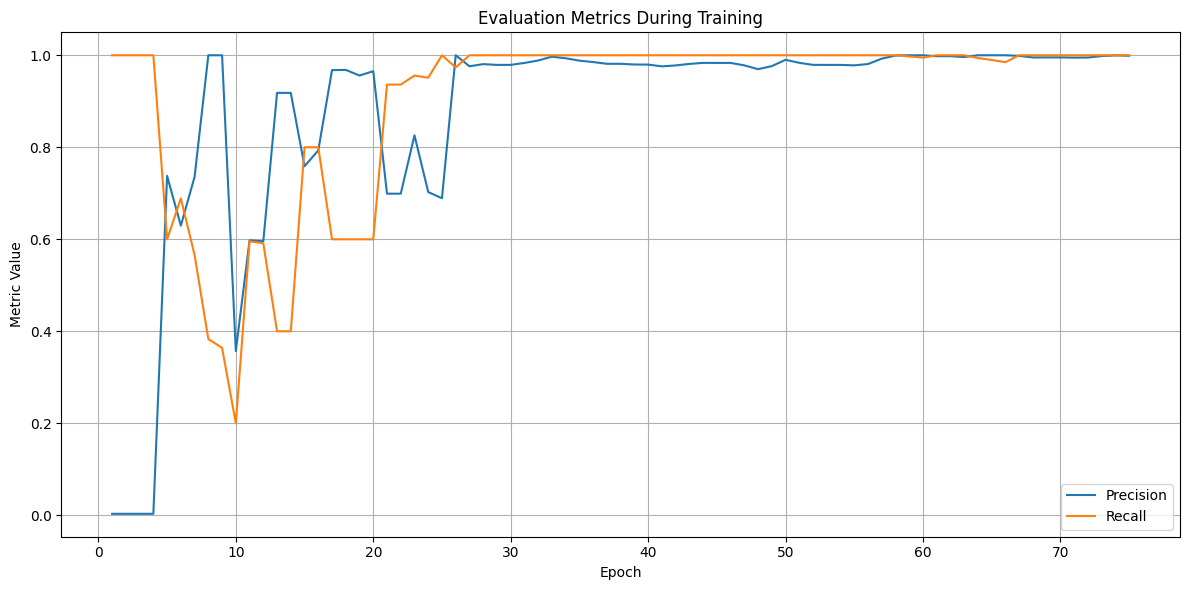

In [24]:
#looking at loss functions
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
df = pd.read_csv('runs/detect/train2/results.csv')

# Show column names to understand what metrics are available
print(df.columns)

plt.figure(figsize=(12, 6))

df.columns = df.columns.str.strip()

plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics During Training')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

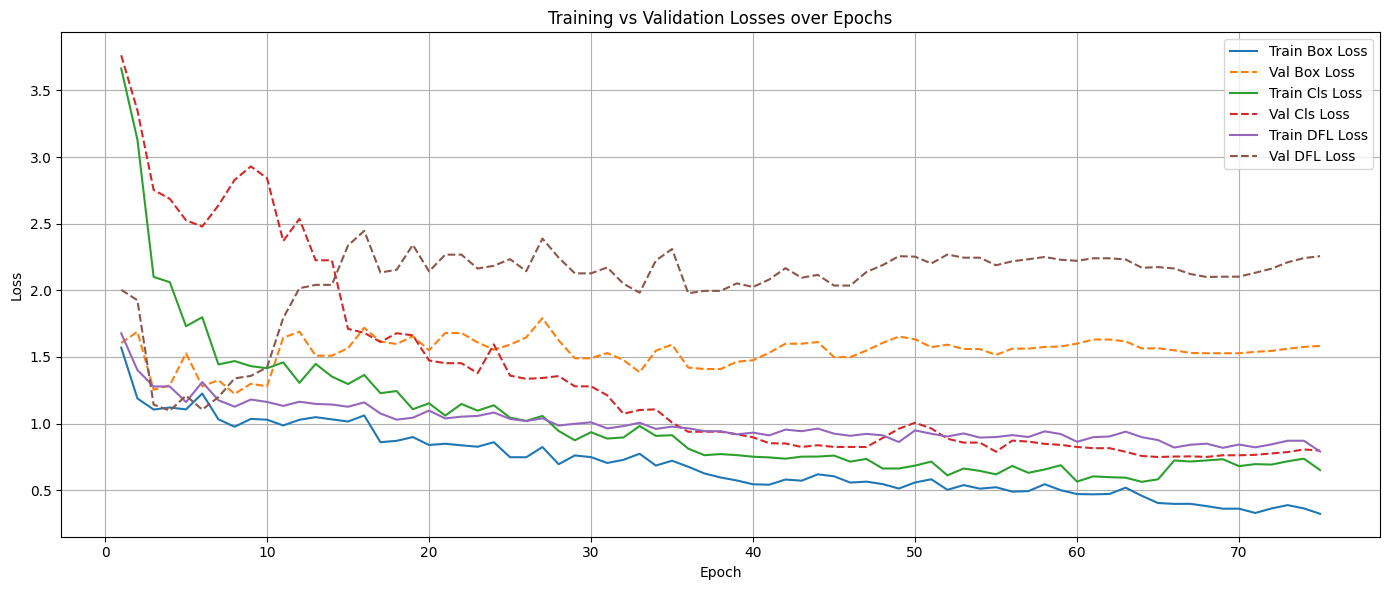

In [26]:
#loss between training and validation losses
import pandas as pd
import matplotlib.pyplot as plt

# Load training log
df = pd.read_csv('runs/detect/train2/results.csv')
df.columns = df.columns.str.strip()

# Plot each loss type
plt.figure(figsize=(14, 6))

# Box Loss
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', linestyle='-')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', linestyle='--')

# Classification Loss
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss', linestyle='-')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', linestyle='--')

# DFL Loss
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss', linestyle='-')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Losses over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Predict on test images
files

In [ ]:
!pip install easyocr

In [28]:
#uploading files
from google.colab import files

uploaded = files.upload()  # This will prompt you to select files

Saving WhatsApp Image 2025-07-14 at 10.14.55.jpeg to WhatsApp Image 2025-07-14 at 10.14.55 (1).jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.58 (1).jpeg to WhatsApp Image 2025-07-14 at 10.14.58 (1) (1).jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.58.jpeg to WhatsApp Image 2025-07-14 at 10.14.58 (2).jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg to WhatsApp Image 2025-07-14 at 10.14.59 (1) (1).jpeg
Saving WhatsApp Image 2025-07-14 at 10.14.59.jpeg to WhatsApp Image 2025-07-14 at 10.14.59 (2).jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.00.jpeg to WhatsApp Image 2025-07-14 at 10.15.00 (1).jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.01 (1).jpeg to WhatsApp Image 2025-07-14 at 10.15.01 (1) (1).jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.01.jpeg to WhatsApp Image 2025-07-14 at 10.15.01 (2).jpeg
Saving WhatsApp Image 2025-07-14 at 10.15.02.jpeg to WhatsApp Image 2025-07-14 at 10.15.02 (1).jpeg


In [31]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")  # change path if needed


# List of uploaded image filenames
image_list = [
    "WhatsApp Image 2025-07-14 at 10.14.58 (1).jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.58.jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg",
    "WhatsApp Image 2025-07-14 at 10.14.59.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.00.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.01 (1).jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.01.jpeg",
    "WhatsApp Image 2025-07-14 at 10.15.02.jpeg"
]

# Run prediction on each image separately
for image_path in image_list:
    print(f"Running prediction on: {image_path}")
    results = model.predict(source=image_path, save=True, conf=0.25)

Running prediction on: WhatsApp Image 2025-07-14 at 10.14.58 (1).jpeg

image 1/1 /content/WhatsApp Image 2025-07-14 at 10.14.58 (1).jpeg: 480x640 1 Number_Plate, 37.3ms
Speed: 2.8ms preprocess, 37.3ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
Running prediction on: WhatsApp Image 2025-07-14 at 10.14.58.jpeg

image 1/1 /content/WhatsApp Image 2025-07-14 at 10.14.58.jpeg: 640x320 1 Number_Plate, 38.1ms
Speed: 2.6ms preprocess, 38.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict
Running prediction on: WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg

image 1/1 /content/WhatsApp Image 2025-07-14 at 10.14.59 (1).jpeg: 640x480 1 Number_Plate, 49.5ms
Speed: 2.4ms preprocess, 49.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
Running prediction on: WhatsApp Image 2025-07-14 at 10.14.59.jpeg

image 1/1 /content/WhatsApp Imag

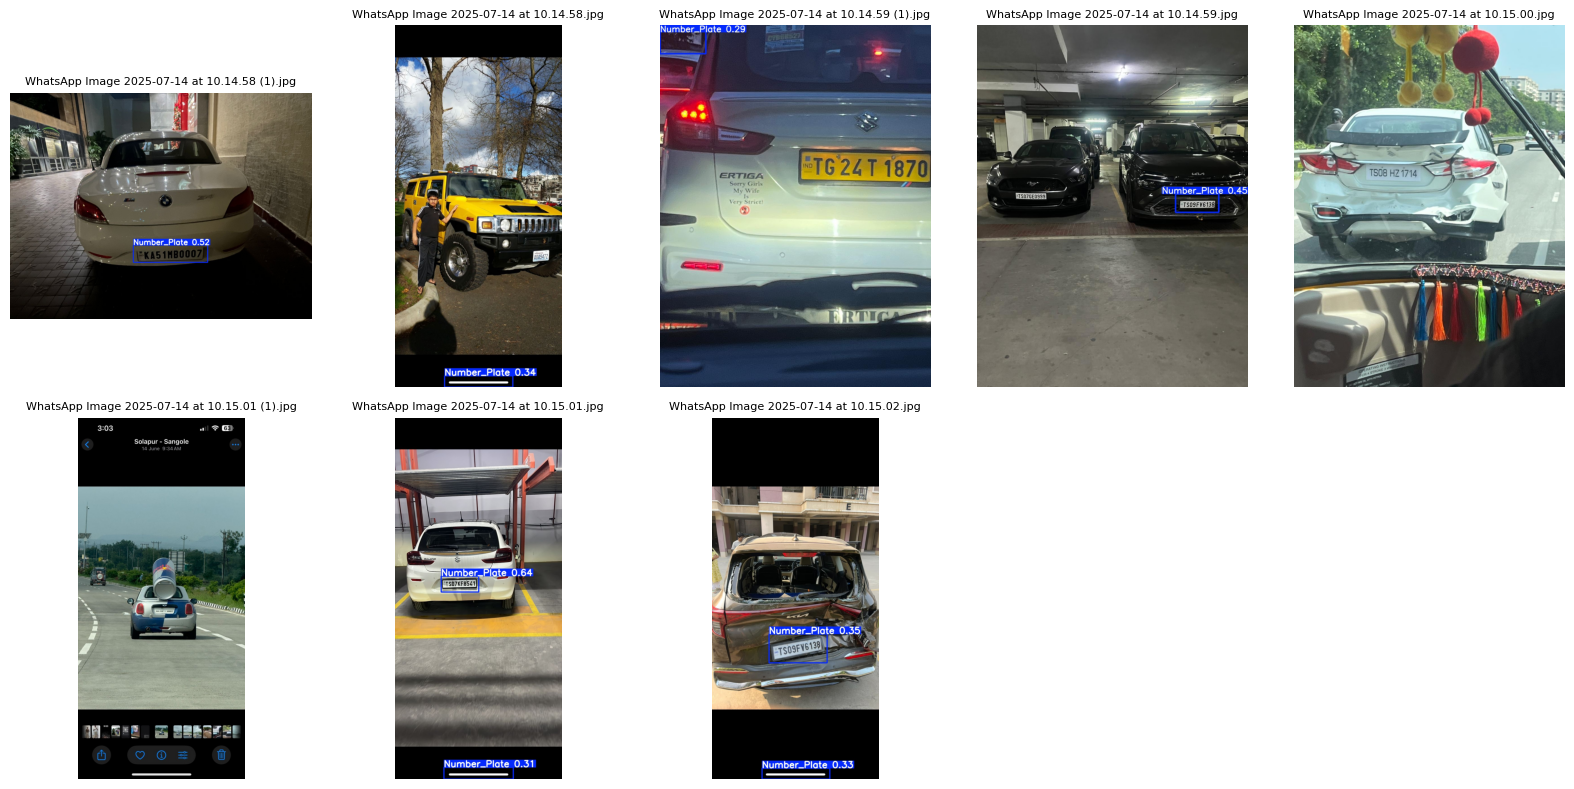

In [32]:
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

# 1. Find the latest 'predict' folder
predict_base = 'runs/detect'
subdirs = [d for d in os.listdir(predict_base) if 'predict' in d]
latest_predict = sorted(subdirs, key=lambda x: os.path.getmtime(os.path.join(predict_base, x)))[-1]
predict_path = os.path.join(predict_base, latest_predict)

# 2. List all prediction image files
image_files = sorted(glob.glob(os.path.join(predict_path, '*.jpg')) +
                     glob.glob(os.path.join(predict_path, '*.jpeg')) +
                     glob.glob(os.path.join(predict_path, '*.png')))

# 3. Display predictions
plt.figure(figsize=(16, 8))
for i, image_path in enumerate(image_files):
    img = Image.open(image_path)
    plt.subplot(2, len(image_files)//2 + 1, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(image_path), fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

tested various irl car images:
  Analysis:
    1)Dataset may be too small because model does not detect few extreme cases (license plates of car crashes)
    2)Also doesn't recognize multiple lisence plates in a single image
    3) May not be able to view blurry, far images(again may be due to lack of training data)
    4) Testing dataset was too little


In [34]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 27.5 MB/s eta 0:00:00


In [35]:
import easyocr
from PIL import Image
import glob

In [36]:
#Create OCR reader
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [40]:
#Find one prediction image from YOLO output
pred_images = glob.glob('/runs/detect/predict/*.jpg')

In [41]:
!pip install -q ultralytics easyocr


0: 480x640 1 Number_Plate, 15.2ms
Speed: 5.3ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

📸 Image: WhatsApp Image 2025-07-14 at 10.14.58 (1).jpg
🔠 OCR Result 1: Alannenn


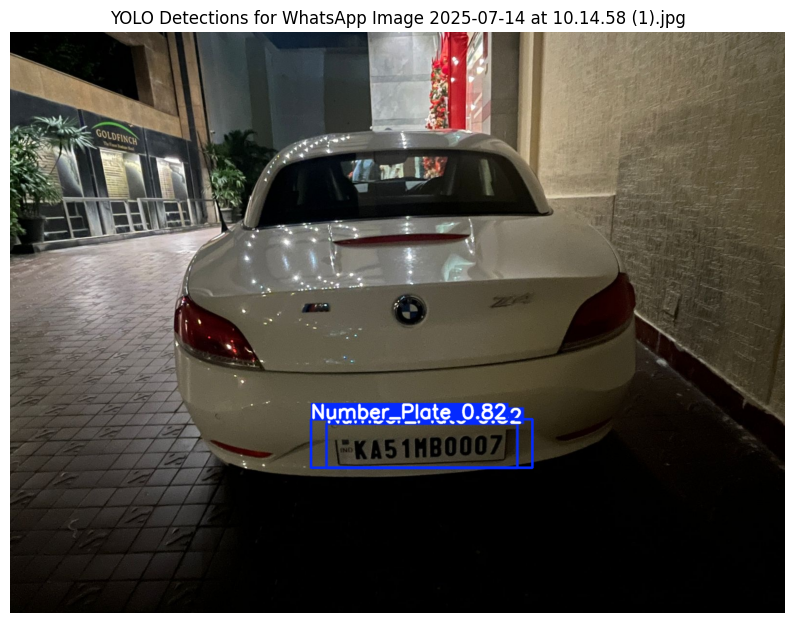


0: 640x320 (no detections), 12.0ms
Speed: 3.1ms preprocess, 12.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 320)

📸 Image: WhatsApp Image 2025-07-14 at 10.14.58.jpg


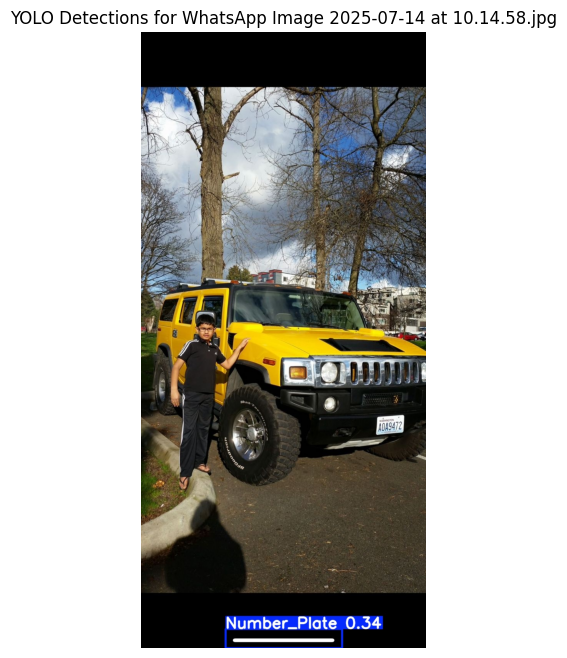


0: 640x480 (no detections), 11.9ms
Speed: 3.2ms preprocess, 11.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)

📸 Image: WhatsApp Image 2025-07-14 at 10.14.59 (1).jpg


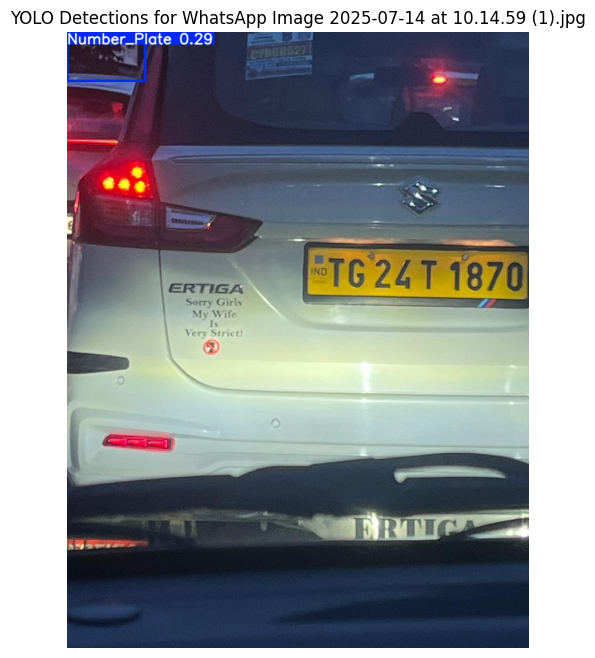


0: 640x480 1 Number_Plate, 10.3ms
Speed: 3.4ms preprocess, 10.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

📸 Image: WhatsApp Image 2025-07-14 at 10.14.59.jpg
🔠 OCR Result 1: ISO9FV6138


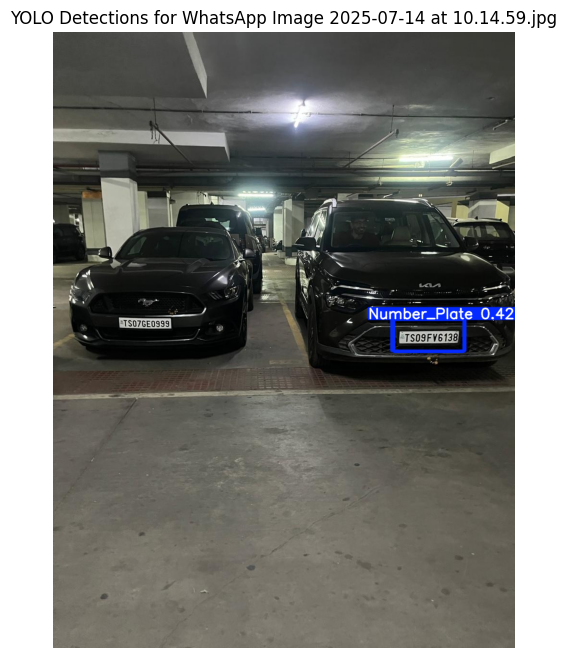


0: 640x480 (no detections), 10.0ms
Speed: 3.3ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

📸 Image: WhatsApp Image 2025-07-14 at 10.15.00.jpg


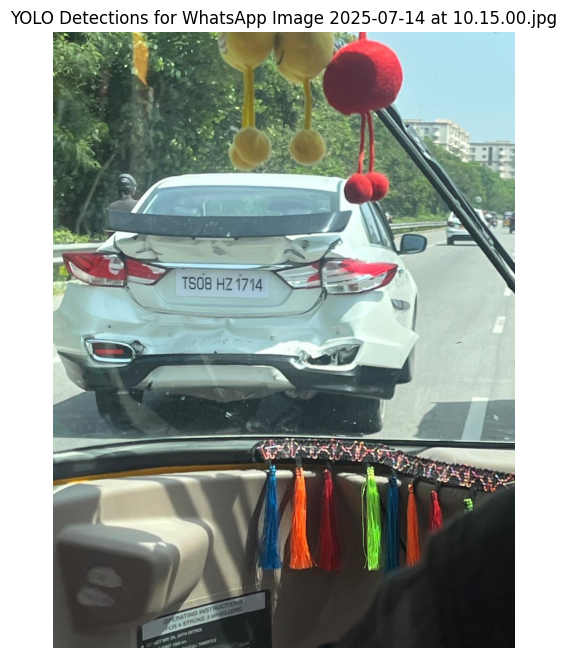


0: 640x320 (no detections), 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 320)

📸 Image: WhatsApp Image 2025-07-14 at 10.15.01 (1).jpg


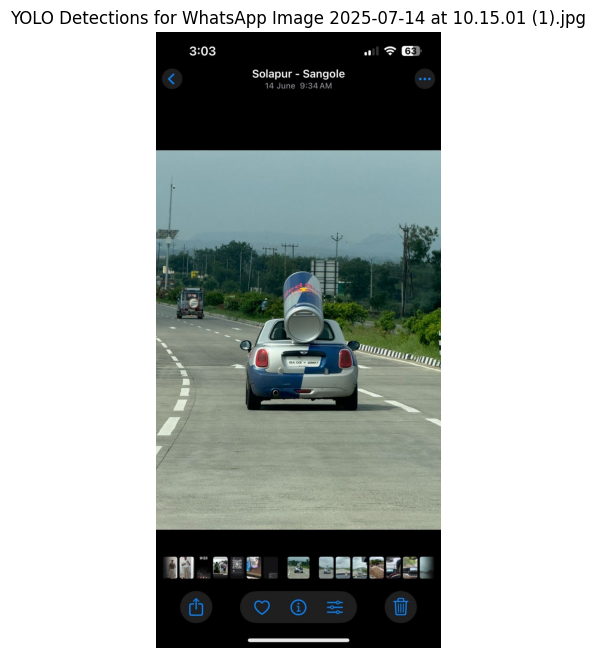


0: 640x320 (no detections), 10.8ms
Speed: 2.9ms preprocess, 10.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 320)

📸 Image: WhatsApp Image 2025-07-14 at 10.15.01.jpg


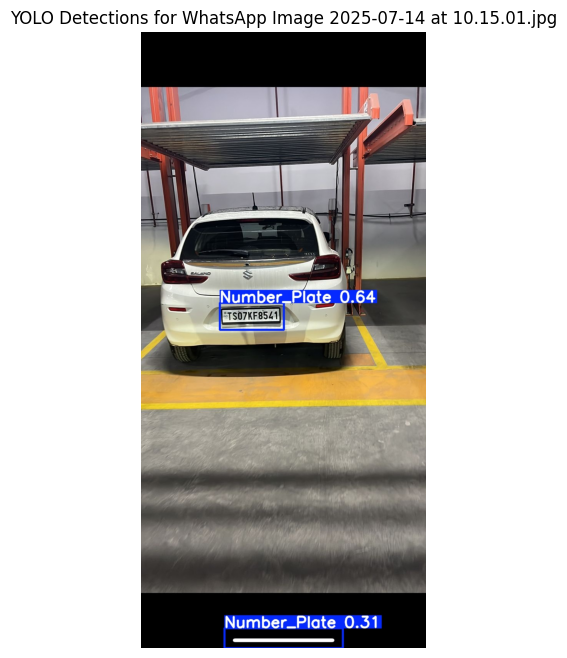


0: 640x320 1 Number_Plate, 9.9ms
Speed: 3.2ms preprocess, 9.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 320)

📸 Image: WhatsApp Image 2025-07-14 at 10.15.02.jpg
🔠 OCR Result 1: 138]


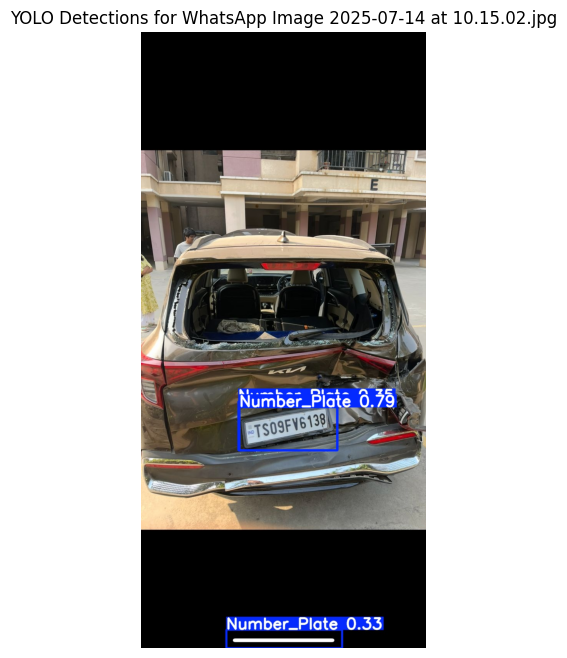

In [46]:
import cv2
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr

# Load YOLOv8 model
#model = YOLO('runs/detect/train/weights/best.pt')  # change path if needed

# Initialize EasyOCR
reader = easyocr.Reader(['en'])

# Set image folder path
img_dir = "runs/detect/predict"  # e.g. 'uploads/' or 'runs/detect/predict/'
images = sorted([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

for img_name in images:
    img_path = os.path.join(img_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        print(f"⚠️ Failed to load image: {img_name}")
        continue

    # Run detection
    results = model(img)
    boxes = results[0].boxes
    print(f"\n📸 Image: {img_name}")

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cropped_plate = img[y1:y2, x1:x2]

        # Run EasyOCR on the cropped region
        ocr_result = reader.readtext(cropped_plate)

        # Extract and print recognized text
        if ocr_result:
            text = ocr_result[0][1]
            print(f"🔠 OCR Result {i+1}: {text}")
        else:
            print(f"🔍 OCR Result {i+1}: No text detected.")

    # Show the full annotated image
    annotated_img = results[0].plot()
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title(f"YOLO Detections for {img_name}")
    plt.axis('off')
    plt.show()

OCR process is comprimised which may be because alpr process is comprimised

FINAL VEREDICT:

The model may need a larger dataset more with variance to perform better which may definetely increase confidence

for example:

1)Was unable to detect a yellow lisence plate

2)Also was unable to detect multiple lisence plates in a single picture

3) Was unable to detect bright license plates

OVERFITTING the box loss

Class losses are pretty close but are underfitting as the losses are higher and not upto mark

OVERFITTING DFL LOSSES AS WELL(huge loss gap)

but definetely has good scope because recall and precision are pretty high

In [51]:
!git config --global user.email "abhiadari2005@gmail.com"
!git config --global user.name "Abhishek Adari"
!git clone https://github.com/Abhishek-Adari/Computer-Vision-Projects.git

fatal: destination path 'Computer-Vision-Projects' already exists and is not an empty directory.


In [57]:
!mv Abhi_ALPR.ipynb Computer-Vision-Projects/

mv: cannot stat 'Abhi_ALPR.ipynb': No such file or directory
